In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collect import (
    GROUP_MAP,
    GROUP_MAP_CEQ,
    GROUP_MAP_CW,
    MAP_AUDIO_TASK,
    AUDIO_TASK_PERFORMANCE_METRIC,
    MAP_MODEL_NAME,
    MODEL_ORDER,
    GROUP_ORDER_CEQ,
    GROUP_ORDER_CW,
)

In [26]:
df_audio_task_ceq = {}
for audio_task in MAP_AUDIO_TASK.keys():
    df_audio_task_ceq[audio_task] = pd.read_excel(f"summary_ceq_no_constraints.xlsx", sheet_name=f"{audio_task}_grouped")

df_audio_task_cot = {}
for audio_task in MAP_AUDIO_TASK.keys():
    df_audio_task_cot[audio_task] = pd.read_excel(f"summary_CoT_no_constraints.xlsx", sheet_name=audio_task)

# df_audio_task_cw = {}
# for audio_task in MAP_AUDIO_TASK.keys():
#     if audio_task == "MMAU":
#         continue
#     df_audio_task_cw[audio_task] = pd.read_excel(f"summary_cw.xlsx", sheet_name=f"{audio_task}_grouped")

In [65]:
df_audio_task_ceq_org = {}
for audio_task in MAP_AUDIO_TASK.keys():
    df_audio_task_ceq_org[audio_task] = pd.read_excel(f"summary_ceq.xlsx", sheet_name=f"{audio_task}_grouped")

df_audio_task_cot_org = {}
for audio_task in MAP_AUDIO_TASK.keys():
    df_audio_task_cot_org[audio_task] = pd.read_excel(f"summary_CoT.xlsx", sheet_name=audio_task)


In [66]:
df_audio_task_ceq_org

{'ASR':      shot_level IF_task_group                          model   n  \
 0             0   change_case                          qwen2  25   
 1             0   change_case                       desta2_5  25   
 2             0   change_case                       blsp-emo  25   
 3             0   change_case                    qwen25_omni  25   
 4             0   change_case               gemini-2.5-flash  25   
 ..          ...           ...                            ...  ..   
 283           8      startend                    qwen25_omni  25   
 284           8      startend               gemini-2.5-flash  25   
 285           8      startend         gemini-3-flash-preview  25   
 286           8      startend     cascade_qwen25-7b-instruct  25   
 287           8      startend  cascade_llama-3_1-8b-instruct  25   
 
      if_rate_strict  if_rate_loose  mean_performance  
 0              0.80           0.80          0.126365  
 1              1.00           1.00          0.1621

In [5]:
outs = {}
for k, v in df_audio_task_ceq.items():
    outs[k] = []
    for shot_level in v["shot_level"].unique():
        tmp = v.loc[v["shot_level"].eq(shot_level)].copy()
        tmp["model"] = pd.Categorical(tmp["model"], categories=MODEL_ORDER, ordered=True)
        tmp["IF_task_group"] = pd.Categorical(tmp["IF_task_group"], categories=GROUP_ORDER_CEQ, ordered=True)

        out = tmp.pivot_table(
            index="model",
            columns="IF_task_group",
            values="if_rate_strict",
            aggfunc="mean",
            observed=False,
            sort=False,
        )
        outs[k].append(out)

# CEQ

In [ ]:
DF_audio_task_ceq = pd.concat(
    list(df_audio_task_ceq.values()),
    keys=list(df_audio_task_ceq.keys()),
    names=["audio_task"]
).reset_index()

DF_ceq = DF_audio_task_ceq.groupby(["IF_task_group", "model", "shot_level"]).mean(numeric_only=True).reset_index()
DF_ceq["model"] = pd.Categorical(DF_ceq["model"], categories=MODEL_ORDER, ordered=True)
DF_ceq["IF_task_group"] = pd.Categorical(DF_ceq["IF_task_group"], categories=GROUP_ORDER_CEQ, ordered=True)

In [17]:
DF_audio_task_ceq_org = pd.concat(
    list(df_audio_task_ceq_org.values()),
    keys=list(df_audio_task_ceq_org.keys()),
    names=["audio_task"]
).reset_index()

DF_ceq_org = DF_audio_task_ceq_org.groupby(["IF_task_group", "model", "shot_level"]).mean(numeric_only=True).reset_index()
DF_ceq_org["model"] = pd.Categorical(DF_ceq_org["model"], categories=MODEL_ORDER, ordered=True)
DF_ceq_org["IF_task_group"] = pd.Categorical(DF_ceq_org["IF_task_group"], categories=GROUP_ORDER_CEQ, ordered=True)

In [ ]:
pt_ceq = DF_ceq.pivot_table(
    index=["model", "shot_level"],
    columns="IF_task_group",
    values="if_rate_strict",
    aggfunc="mean",
    observed=False,
    sort=False,
)
pt_ceq["Avg."] = pt_ceq.mean(axis=1)

In [18]:
pt_ceq_org = DF_ceq_org.pivot_table(
    index=["model", "shot_level"],
    columns="IF_task_group",
    values="if_rate_strict",
    aggfunc="mean",
    observed=False,
    sort=False,
)
pt_ceq_org["Avg."] = pt_ceq_org.mean(axis=1)

In [149]:
pt_0 = pt_ceq_org.loc[:, 0, :]
pt_1 = pt_ceq.loc[:, 1, :]
pt_k = pt_ceq[pt_ceq.index.get_level_values("shot_level") > 0].groupby("model", observed=False).mean()
tb_ceq = pd.concat([pt_0, pt_1, pt_k], keys=["Zero-shot", "One-shot", "Few-shot"], names=["Setting"])
tb_ceq = tb_ceq.swaplevel("Setting", "model").reset_index().sort_values("model").set_index(["model", "Setting"])
round(tb_ceq * 100, 2)

IF_task_group               change_case  startend  wrapping  json_format  \
model            Setting                                                   
qwen2            Zero-shot        77.61     65.92     20.32         0.00   
                 One-shot         25.18     10.79     29.96        16.21   
                 Few-shot         33.24     50.59     54.04        36.60   
desta2_5         Zero-shot        99.40     94.38     93.50        98.54   
                 One-shot         14.98     24.25     31.39        24.78   
                 Few-shot         56.00     57.91     73.04        78.34   
blsp-emo         Zero-shot        66.67     61.92     38.11        95.83   
                 One-shot         48.49     49.96     77.05        94.00   
                 Few-shot         79.04     88.99     95.93        98.12   
qwen25_omni      Zero-shot        96.31     90.38     91.34        73.36   
                 One-shot         56.04     29.83     65.24        86.86   
                 Few-shot         85.39     85.16     87.28        96.03   
gemini-2.5-flash Zero-shot        98.20    100.00    100.00       100.00   
                 One-shot         59.11     11.50     78.38        93.27   
                 Few-shot         73.43     27.14     92.31        95.71   

IF_task_group                Avg.  
model            Setting           
qwen2            Zero-shot  40.96  
                 One-shot   20.53  
                 Few-shot   43.62  
desta2_5         Zero-shot  96.45  
                 One-shot   23.85  
                 Few-shot   66.32  
blsp-emo         Zero-shot  65.63  
                 One-shot   67.37  
                 Few-shot   90.52  
qwen25_omni      Zero-shot  87.85  
                 One-shot   59.49  
                 Few-shot   88.46  
gemini-2.5-flash Zero-shot  99.55  
                 One-shot   60.56  
                 Few-shot   72.15

In [150]:
tb_ceq.to_csv("tables_ceq_no_constraints_few-shot.csv", index=True)

# CW

In [11]:
DF_audio_task_cw = pd.concat(
    list(df_audio_task_cw.values()),
    keys=list(df_audio_task_cw.keys()),
    names=["audio_task"]
).reset_index().drop(columns=["level_1"]).dropna()
DF_audio_task_cw["model"] = pd.Categorical(DF_audio_task_cw["model"], categories=MODEL_ORDER, ordered=True)
DF_audio_task_cw["IF_task_group"] = pd.Categorical(DF_audio_task_cw["IF_task_group"], categories=GROUP_ORDER_CW, ordered=True)

pt_cw = DF_audio_task_cw.groupby(["IF_task_group", "model", "shot_level"], observed=False).mean(numeric_only=True)
pt_cw = pt_cw.reset_index().pivot_table(
    index=["model", "shot_level"],
    columns="IF_task_group",
    values="if_rate",
    aggfunc="mean",
    observed=False,
    sort=False,
)
pt_cw["Avg."] = pt_cw.mean(axis=1)

In [12]:
pt_0_cw = pt_cw.loc[:, 0, :]
pt_k_cw = pt_cw[pt_cw.index.get_level_values("shot_level") > 0].groupby("model", observed=False).mean()
tb_cw = pd.concat([pt_0_cw, pt_k_cw], keys=["Zero-shot", "ICL"], names=["Setting"])
tb_cw = tb_cw.swaplevel("Setting", "model").reset_index().sort_values("model").set_index(["model", "Setting"])
tb_cw.to_csv("tables_cw.csv", index=True)
round(tb_cw * 100, 2)

IF_task_group                            bullet_lists  keywords  \
model                         Setting                             
qwen2                         Zero-shot         82.78     75.00   
                              ICL               78.10     81.75   
desta2_5                      Zero-shot         90.93     86.00   
                              ICL               96.69     88.12   
blsp-emo                      Zero-shot         76.85     53.00   
                              ICL               97.81     55.12   
qwen25_omni                   Zero-shot          0.93     83.00   
                              ICL               96.15     89.25   
gemini-2.5-flash              Zero-shot         96.48    100.00   
                              ICL               99.90     99.50   
gemini-3-flash-preview        Zero-shot         99.17    100.00   
                              ICL              100.00     99.88   
cascade_qwen25-7b-instruct    Zero-shot         88.52     92.00   
                              ICL               96.27     96.75   
cascade_llama-3_1-8b-instruct Zero-shot         85.83     87.00   
                              ICL               84.90     94.00   

IF_task_group                            length_constraints   Avg.  
model                         Setting                               
qwen2                         Zero-shot               54.33  70.70  
                              ICL                     56.79  72.21  
desta2_5                      Zero-shot               80.65  85.86  
                              ICL                     90.71  91.84  
blsp-emo                      Zero-shot               59.37  63.07  
                              ICL                     70.51  74.48  
qwen25_omni                   Zero-shot               60.38  48.10  
                              ICL                     68.14  84.51  
gemini-2.5-flash              Zero-shot               93.01  96.50  
                              ICL                     93.42  97.61  
gemini-3-flash-preview        Zero-shot               97.63  98.93  
                              ICL                     97.33  99.07  
cascade_qwen25-7b-instruct    Zero-shot               55.60  78.71  
                              ICL                     64.07  85.70  
cascade_llama-3_1-8b-instruct Zero-shot               83.24  85.36  
                              ICL                     86.97  88.62

# CoT

In [29]:
DF_audio_task_cot = pd.concat(
    list(df_audio_task_cot.values()),
    keys=list(df_audio_task_cot.keys()),
).reset_index().rename(columns={"level_0": "audio_task"})
DF_audio_task_cot["model"] = pd.Categorical(DF_audio_task_cot["model"], categories=MODEL_ORDER, ordered=True)
pt_cot = DF_audio_task_cot.groupby(["model", "shot_level"], observed=False).mean(numeric_only=True)
pt_cot = pt_cot.reset_index().pivot_table(
    index=["model", "shot_level"],
    values="w/o CoT Acc",
    aggfunc="mean",
    observed=False,
    sort=False,
)

In [91]:
DF_cot = DF_audio_task_cot.groupby(["model", "shot_level"]).mean(numeric_only=True).reset_index()
DF_cot["model"] = pd.Categorical(DF_cot["model"], categories=MODEL_ORDER, ordered=True)
# DF_cot["IF_task_group"] = pd.Categorical(DF_ceq["IF_task_group"], categories=GROUP_ORDER_CEQ, ordered=True)

/tmp/ipykernel_1071591/3905681500.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DF_cot = DF_audio_task_cot.groupby(["model", "shot_level"]).mean(numeric_only=True).reset_index()


In [95]:
DF_cot

,model,shot_level,level_1,n,New CoT Acc,New task wer,w/o CoT Acc,w/o task wer,w/o both CoT Acc,w/o both Task Acc,Old CoT Acc,Old task wer,New Task Acc,w/o Task Acc,Old Task Acc,mean_performance
0,qwen2,0,18.0,43.75,0.305873,0.114495,0.029398,0.041413,NaN,NaN,0.283386,0.249695,0.642995,0.720428,0.707849,0.550674
1,qwen2,1,19.0,43.75,0.504626,0.180268,0.257042,0.043849,NaN,NaN,0.473702,0.529842,0.669846,0.608936,0.668605,0.467664
2,qwen2,2,20.0,43.75,0.593852,0.187576,0.326513,0.040195,NaN,NaN,0.548018,0.386114,0.604070,0.654343,0.706977,0.500806
3,qwen2,3,21.0,43.75,0.638011,0.275274,0.312624,0.045067,NaN,NaN,0.547456,0.235079,0.602218,0.606503,0.646221,0.466144
4,qwen2,4,22.0,43.75,0.677887,0.310597,0.342912,0.045067,NaN,NaN,0.565228,0.309379,0.612984,0.681611,0.572093,0.522475
5,qwen2,5,23.0,43.75,0.667081,0.221681,0.352698,0.045067,NaN,NaN,0.619667,0.208283,0.588150,0.664255,0.574709,0.509458
6,qwen2,6,24.0,43.75,0.625947,0.200974,0.329318,0.043849,NaN,NaN,0.590000,0.285018,0.573478,0.620428,0.645349,0.476283
7,qwen2,7,25.0,43.75,0.629500,0.180268,0.326513,0.046285,NaN,NaN,0.602789,0.394641,0.604651,0.615999,0.598837,0.473571
8,qwen2,8,26.0,43.75,0.654411,0.200974,0.347088,0.045067,NaN,NaN,0.618789,0.260658,0.574060,0.597208,0.620349,0.459173
9,desta2_5,0,9.0,43.75,0.924861,0.048721,0.420308,0.155907,NaN,NaN,0.870737,0.116931,0.757738,0.774404,0.681977,0.619780


In [ ]:
plt.figure(figsize=(8, 6))
for model in MODEL_ORDER:
    sub_tmp = DF_cot[DF_cot["model"] == model]
    plt.plot(
        sub_tmp["shot_level"],
        sub_tmp["w/o CoT Acc"],
        marker='o',
        label=MAP_MODEL_NAME[model]
    )
plt.title(f"CoT Strict IF Rate vs Shot Level")
plt.xlabel("Number of Examples")
plt.ylabel("IF Rate")
plt.xticks(range(9))
plt.grid(linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
# plt.savefig(f"figures/plots_ceq_if_rate_{group}.png", dpi=300)

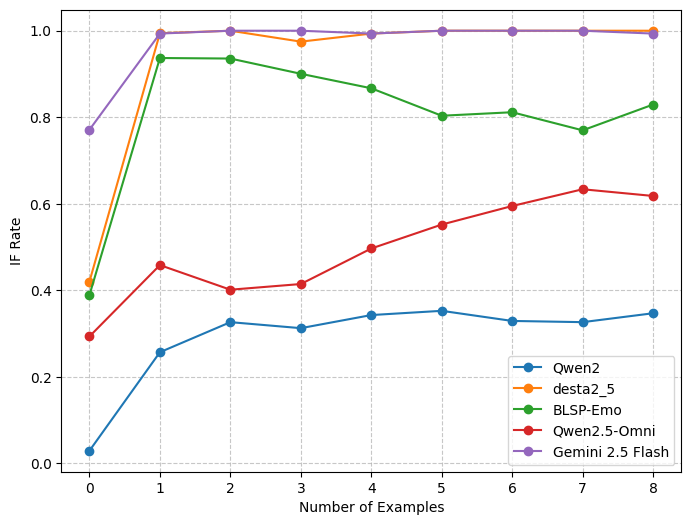

In [ ]:
plt.figure(figsize=(8, 6))
for model in MODEL_ORDER:
    sub_tmp = DF_cot[DF_cot["model"] == model]
    plt.plot(
        sub_tmp["shot_level"],
        sub_tmp["w/o CoT Acc"],
        marker='o',
        label=MAP_MODEL_NAME[model]
    )
plt.title(f"CoT Strict IF Rate vs Shot Level")
plt.xlabel("Number of Examples")
plt.ylabel("IF Rate")
plt.xticks(range(9))
plt.grid(linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
# plt.savefig(f"figures/plots_ceq_if_rate_{group}.png", dpi=300)

In [30]:
DF_audio_task_cot_org = pd.concat(
    list(df_audio_task_cot_org.values()),
    keys=list(df_audio_task_cot_org.keys()),
).reset_index().rename(columns={"level_0": "audio_task"})
DF_audio_task_cot_org["model"] = pd.Categorical(DF_audio_task_cot_org["model"], categories=MODEL_ORDER, ordered=True)
pt_cot_org = DF_audio_task_cot_org.groupby(["model", "shot_level"], observed=False).mean(numeric_only=True)
pt_cot_org = pt_cot_org.reset_index().pivot_table(
    index=["model", "shot_level"],
    values="New CoT Acc",
    aggfunc="mean",
    observed=False,
    sort=False,
)

In [31]:
pt_0_cot = pt_cot.loc[:, 0, :]
pt_k_cot = pt_cot[pt_cot.index.get_level_values("shot_level") > 0].groupby("model", observed=False).mean()
tb_cot = pd.concat([pt_0_cot, pt_k_cot], keys=["Zero-shot", "ICL"], names=["Setting"])
tb_cot = tb_cot.swaplevel("Setting", "model").reset_index().sort_values("model").set_index(["model", "Setting"])
tb_cot.to_csv("tables_cot.csv", index=True)
round(tb_cot * 100  , 2)

w/o CoT Acc
model            Setting               
qwen2            Zero-shot         2.94
                 ICL              32.43
desta2_5         Zero-shot        42.03
                 ICL              99.53
blsp-emo         Zero-shot        38.92
                 ICL              85.68
qwen25_omni      Zero-shot        29.35
                 ICL              52.12
gemini-2.5-flash Zero-shot        77.12
                 ICL              99.75

In [153]:
pt_0_cot = pt_cot_org.loc[:, 0, :]
pt_1_cot = pt_cot.loc[:, 1, :]
pt_k_cot = pt_cot[pt_cot.index.get_level_values("shot_level") >= 1].groupby("model", observed=False).mean()
tb_cot = pd.concat([pt_0_cot, pt_1_cot, pt_k_cot], keys=["Zero-shot", "One-shot", "Few-shot"], names=["Setting"])
tb_cot = tb_cot.swaplevel("Setting", "model").reset_index().sort_values("model").set_index(["model", "Setting"])
tb_cot["CoT"] = tb_cot.fillna(0).sum(axis=1)
tb_cot = tb_cot[["CoT"]]
tb_cot.to_csv("tables_cot_no_constraints_.csv", index=True)
round(tb_cot * 100  , 2)

CoT
model            Setting         
qwen2            Zero-shot  30.59
                 One-shot   25.70
                 Few-shot   32.43
desta2_5         Zero-shot  92.49
                 One-shot   99.42
                 Few-shot   99.53
blsp-emo         Zero-shot  57.85
                 One-shot   93.70
                 Few-shot   85.68
qwen25_omni      Zero-shot  58.91
                 One-shot   45.84
                 Few-shot   52.12
gemini-2.5-flash Zero-shot  97.37
                 One-shot   99.34
                 Few-shot   99.75

In [154]:
# tb_if = pd.concat([tb_ceq, tb_cw, tb_cot], axis=1, keys=["CEQ", "CW", "CoT"])
tb_if = pd.concat([tb_ceq, tb_cot], axis=1, keys=["CEQ", "CoT"])
tb_if.to_csv("tables_if_rate_no_constraints_few-shot.csv", index=True)
round(tb_if, 4) * 100

CEQ                                       \
                           change_case startend wrapping json_format   Avg.   
model            Setting                                                      
qwen2            Zero-shot       77.61    65.92    20.32        0.00  40.96   
                 One-shot        25.18    10.79    29.96       16.21  20.53   
                 Few-shot        33.24    50.59    54.04       36.60  43.62   
desta2_5         Zero-shot       99.40    94.38    93.50       98.54  96.45   
                 One-shot        14.98    24.25    31.39       24.78  23.85   
                 Few-shot        56.00    57.91    73.04       78.34  66.32   
blsp-emo         Zero-shot       66.67    61.92    38.11       95.83  65.63   
                 One-shot        48.49    49.96    77.05       94.00  67.37   
                 Few-shot        79.04    88.99    95.93       98.12  90.52   
qwen25_omni      Zero-shot       96.31    90.38    91.34       73.36  87.85   
                 One-shot        56.04    29.83    65.24       86.86  59.49   
                 Few-shot        85.39    85.16    87.28       96.03  88.46   
gemini-2.5-flash Zero-shot       98.20   100.00   100.00      100.00  99.55   
                 One-shot        59.11    11.50    78.38       93.27  60.56   
                 Few-shot        73.43    27.14    92.31       95.71  72.15   

                              CoT  
                              CoT  
model            Setting           
qwen2            Zero-shot  30.59  
                 One-shot   25.70  
                 Few-shot   32.43  
desta2_5         Zero-shot  92.49  
                 One-shot   99.42  
                 Few-shot   99.53  
blsp-emo         Zero-shot  57.85  
                 One-shot   93.70  
                 Few-shot   85.68  
qwen25_omni      Zero-shot  58.91  
                 One-shot   45.84  
                 Few-shot   52.12  
gemini-2.5-flash Zero-shot  97.37  
                 One-shot   99.34  
                 Few-shot   99.75

In [158]:
tb_if[[("CEQ", "Avg."), ("CoT", "CoT")]]

CEQ       CoT
                                Avg.       CoT
model            Setting                      
qwen2            Zero-shot  0.409621  0.305873
                 One-shot   0.205340  0.257042
                 Few-shot   0.436180  0.324339
desta2_5         Zero-shot  0.964546  0.924861
                 One-shot   0.238507  0.994186
                 Few-shot   0.663231  0.995298
blsp-emo         Zero-shot  0.656305  0.578520
                 One-shot   0.673748  0.936959
                 Few-shot   0.905227  0.856808
qwen25_omni      Zero-shot  0.878464  0.589121
                 One-shot   0.594912  0.458368
                 Few-shot   0.884630  0.521245
gemini-2.5-flash Zero-shot  0.995506  0.973684
                 One-shot   0.605634  0.993421
                 Few-shot   0.721459  0.997533

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_small_multiples_reverse_grouped_bars(
    df: pd.DataFrame,
    metrics=("CEQ", "CoT"),
    settings_order=("Zero-shot", "One-shot", "Few-shot"),
    ncols=3,
    figsize=(11, 6.5),
    title="Reverse layout: groups=metrics, bars=settings (per model)",
    annotate=True,
):
    """
    Reverse layout:
      - x-axis groups: metrics (e.g., CEQ, CoT)
      - within each metric group: 3 bars (Zero/One/Few-shot)
      - one subplot per model

    df: MultiIndex index=[model, setting], columns include metrics (default: CEQ, CoT)
    """
    assert isinstance(df.index, pd.MultiIndex)
    assert all(m in df.columns for m in metrics)

    models = list(df.index.get_level_values("model").unique())
    n = len(models)
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, constrained_layout=True)
    axes = np.atleast_2d(axes)

    # x positions for metric groups
    x = np.arange(len(metrics))
    n_bars = len(settings_order)
    total_group_width = 0.8
    width = total_group_width / n_bars
    # center bars around each group tick
    offsets = (np.arange(n_bars) - (n_bars - 1) / 2) * width

    # Shared y-range across all panels
    all_vals = df[list(metrics)].to_numpy(dtype=float).ravel()
    y_max = float(np.nanmax(all_vals)) if np.isfinite(np.nanmax(all_vals)) else 1.0
    y_max = min(1.0, max(0.05, y_max * 1.08))

    handles_for_legend = None
    legend_labels = list(settings_order)

    for idx, model in enumerate(models):
        r, c = divmod(idx, ncols)
        ax = axes[r, c]

        # vals shape: [len(settings_order), len(metrics)]
        vals = np.full((len(settings_order), len(metrics)), np.nan, dtype=float)
        for si, s in enumerate(settings_order):
            if (model, s) in df.index:
                vals[si, :] = df.loc[(model, s), list(metrics)].to_numpy(dtype=float)

        bars = []
        for si, s in enumerate(settings_order):
            b = ax.bar(x + offsets[si], vals[si, :], width, label=s)
            bars.append(b)

        if handles_for_legend is None:
            handles_for_legend = [bars[si][0] for si in range(len(settings_order))]

        ax.set_title(model, fontsize=11, fontweight="bold")
        ax.set_xticks(x)
        ax.set_xticklabels(list(metrics))
        ax.set_ylim(0.0, y_max)
        ax.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.6)

        if annotate:
            for si in range(len(settings_order)):
                for rect, v in zip(bars[si], vals[si, :]):
                    if not np.isfinite(v):
                        continue
                    ax.text(
                        rect.get_x() + rect.get_width() / 2,
                        rect.get_height(),
                        f"{v:.3f}",
                        ha="center",
                        va="bottom",
                        fontsize=9,
                    )

    # Turn off unused axes
    for k in range(n, nrows * ncols):
        r, c = divmod(k, ncols)
        axes[r, c].axis("off")

    fig.suptitle(title, fontsize=14, fontweight="bold")
    fig.legend(handles_for_legend, legend_labels, loc="upper right", bbox_to_anchor=(0.99, 0.98))
    return fig

# -------------------------
# Example
# -------------------------
# fig = plot_small_multiples_reverse_grouped_bars(df)
# fig.savefig("reverse_grouped_bars.png", dpi=200, bbox_inches="tight")
# plt.show()

# -------------------------
# Example usage
# -------------------------
# df must be MultiIndex with index names ["model","setting"]
# df = pd.DataFrame([...], columns=["model","setting","CEQ","CoT"]).set_index(["model","setting"])

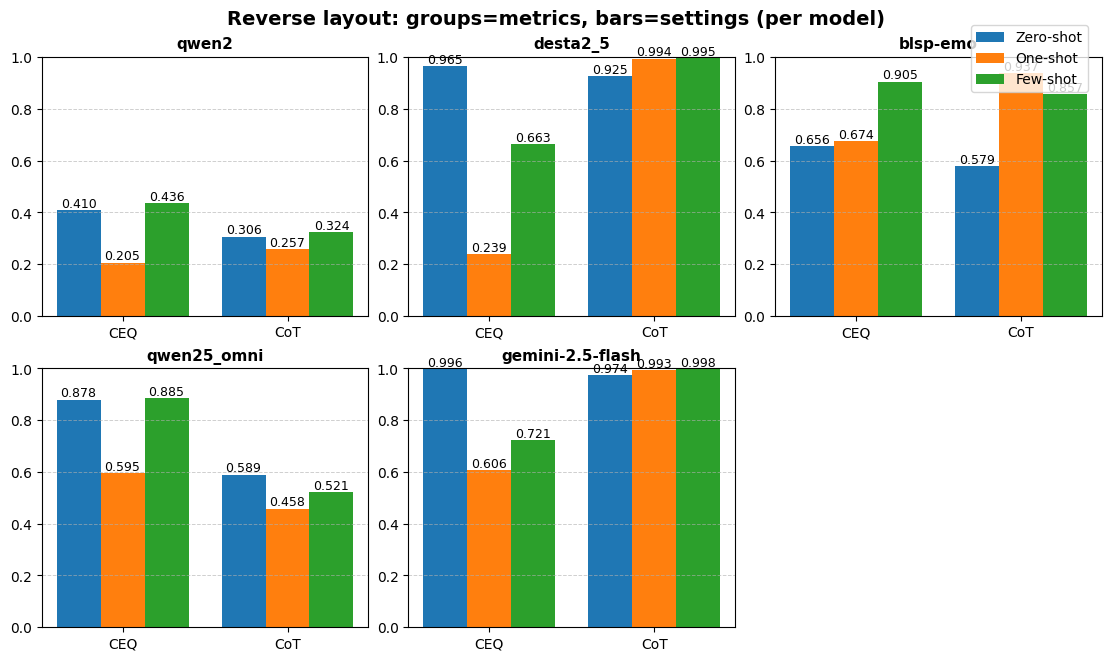

In [163]:
df_vis = tb_if[[("CEQ", "Avg."), ("CoT", "CoT")]]

fig = plot_small_multiples_reverse_grouped_bars(df_vis)
# fig.savefig("small_multiples_grouped_bars.png", dpi=200, bbox_inches="tight")
plt.show()

In [38]:
# tb_if = pd.concat([tb_ceq, tb_cw, tb_cot], axis=1, keys=["CEQ", "CW", "CoT"])
tb_if = pd.concat([tb_ceq, tb_cot], axis=1, keys=["CEQ", "CoT"])
tb_if.to_csv("tables_if_rate_no_constraints.csv", index=True)
round(tb_if, 4) * 100

CEQ                                       \
                           change_case startend wrapping json_format   Avg.   
model            Setting                                                      
qwen2            Zero-shot       77.61    65.92    20.32        0.00  40.96   
                 ICL             33.24    50.59    54.04       36.60  43.62   
desta2_5         Zero-shot       99.40    94.38    93.50       98.54  96.45   
                 ICL             56.00    57.91    73.04       78.34  66.32   
blsp-emo         Zero-shot       66.67    61.92    38.11       95.83  65.63   
                 ICL             79.04    88.99    95.93       98.12  90.52   
qwen25_omni      Zero-shot       96.31    90.38    91.34       73.36  87.85   
                 ICL             85.39    85.16    87.28       96.03  88.46   
gemini-2.5-flash Zero-shot       98.20   100.00   100.00      100.00  99.55   
                 ICL             73.43    27.14    92.31       95.71  72.15   

                              CoT  
                              CoT  
model            Setting           
qwen2            Zero-shot  30.59  
                 ICL        32.43  
desta2_5         Zero-shot  92.49  
                 ICL        99.53  
blsp-emo         Zero-shot  57.85  
                 ICL        85.68  
qwen25_omni      Zero-shot  58.91  
                 ICL        52.12  
gemini-2.5-flash Zero-shot  97.37  
                 ICL        99.75

In [16]:
DF_audio_task_ceq["model"] = pd.Categorical(DF_audio_task_ceq["model"], categories=MODEL_ORDER, ordered=True)
DF_audio_task_ceq.groupby(["model", "audio_task", "shot_level"], observed=False).mean(numeric_only=True)

level_1      n  \
model                         audio_task shot_level                   
qwen2                         ASR        0              12.0  31.25   
                                         1              44.0  31.25   
                                         2              76.0  31.25   
                                         3             108.0  31.25   
                                         4             140.0  31.25   
...                                                      ...    ...   
cascade_llama-3_1-8b-instruct SER        4             147.0  31.25   
                                         5             179.0  31.25   
                                         6             211.0  31.25   
                                         7             243.0  31.25   
                                         8             275.0  31.25   

                                                     if_rate_strict  \
model                         audio_task shot_level                   
qwen2                         ASR        0                    0.450   
                                         1                    0.425   
                                         2                    0.325   
                                         3                    0.365   
                                         4                    0.340   
...                                                             ...   
cascade_llama-3_1-8b-instruct SER        4                    0.810   
                                         5                    0.795   
                                         6                    0.775   
                                         7                    0.730   
                                         8                    0.675   

                                                     if_rate_loose  \
model                         audio_task shot_level                  
qwen2                         ASR        0                   0.450   
                                         1                   0.425   
                                         2                   0.325   
                                         3                   0.365   
                                         4                   0.340   
...                                                            ...   
cascade_llama-3_1-8b-instruct SER        4                   0.810   
                                         5                   0.795   
                                         6                   0.775   
                                         7                   0.730   
                                         8                   0.675   

                                                     mean_performance  
model                         audio_task shot_level                    
qwen2                         ASR        0                   0.353023  
                                         1                   0.305942  
                                         2                   0.243228  
                                         3                   0.244475  
                                         4                   0.231513  
...                                                               ...  
cascade_llama-3_1-8b-instruct SER        4                   0.550000  
                                         5                   0.525000  
                                         6                   0.530000  
                                         7                   0.515000  
                                         8                   0.495000  

[288 rows x 5 columns]

In [48]:
DF_audio_task_ceq_org = DF_audio_task_ceq_org.rename(columns={"if_rate_strict": "IF Rate"})
# DF_audio_task_cw = DF_audio_task_cw.rename(columns={"if_rate": "IF Rate"})
DF_audio_task_cot_org["mean_performance"] = \
    DF_audio_task_cot_org["New Task Acc"].fillna(0) + \
    DF_audio_task_cot_org["New task wer"].fillna(0)
DF_audio_task_cot_org = DF_audio_task_cot_org.rename(columns={"CoT Acc": "IF Rate"})

In [49]:
DFs_org = [
    DF_audio_task_ceq_org.groupby(["model", "audio_task", "shot_level"], observed=False).mean(numeric_only=True),
    # DF_audio_task_cw_org.groupby(["model", "audio_task", "shot_level"], observed=False).mean(numeric_only=True),
    DF_audio_task_cot_org.groupby(["model", "audio_task", "shot_level"], observed=False).mean(numeric_only=True),
]
# DF_audio_task_org = pd.concat(DFs_org, keys=["CEQ", "CW", "CoT"], names=["response_task"]).reset_index()
DF_audio_task_org = pd.concat(DFs_org, keys=["CEQ", "CoT"], names=["response_task"]).reset_index()
DF_audio_task_org["model"] = pd.Categorical(
    DF_audio_task_org["model"], categories=MODEL_ORDER, ordered=True
)
DF_audio_task_org['audio_task'] = pd.Categorical(
    DF_audio_task_org['audio_task'], categories=list(AUDIO_TASK_PERFORMANCE_METRIC.keys()), ordered=True
)

In [50]:
pt_audio_tasks_org = DF_audio_task_org.pivot_table(
    index=["model", "shot_level"],
    columns=["audio_task", "response_task"],
    values=["IF Rate", "mean_performance"],
    aggfunc="mean",
    observed=False,
    sort=False,
)
pt_audio_tasks_org.shape

(45, 12)

In [42]:
DF_audio_task_ceq = DF_audio_task_ceq.rename(columns={"if_rate_strict": "IF Rate"})
# DF_audio_task_cw = DF_audio_task_cw.rename(columns={"if_rate": "IF Rate"})
DF_audio_task_cot["mean_performance"] = \
    DF_audio_task_cot["w/o Task Acc"].fillna(0) + \
    DF_audio_task_cot["w/o task wer"].fillna(0)
DF_audio_task_cot = DF_audio_task_cot.rename(columns={"CoT Acc": "IF Rate"})

In [46]:
DFs = [
    DF_audio_task_ceq.groupby(["model", "audio_task", "shot_level"], observed=False).mean(numeric_only=True),
    # DF_audio_task_cw.groupby(["model", "audio_task", "shot_level"], observed=False).mean(numeric_only=True),
    DF_audio_task_cot.groupby(["model", "audio_task", "shot_level"], observed=False).mean(numeric_only=True),
]
# DF_audio_task = pd.concat(DFs, keys=["CEQ", "CW", "CoT"], names=["response_task"]).reset_index()
DF_audio_task = pd.concat(DFs, keys=["CEQ", "CoT"], names=["response_task"]).reset_index()
DF_audio_task["model"] = pd.Categorical(DF_audio_task["model"], categories=MODEL_ORDER, ordered=True)
DF_audio_task['audio_task'] = pd.Categorical(
    DF_audio_task['audio_task'], categories=list(AUDIO_TASK_PERFORMANCE_METRIC.keys()), ordered=True
)

In [51]:
pt_audio_tasks = DF_audio_task.pivot_table(
    index=["model", "shot_level"],
    columns=["audio_task", "response_task"],
    values=["IF Rate", "mean_performance"],
    aggfunc="mean",
    observed=False,
    sort=False,
)
pt_audio_tasks.shape

(45, 12)

In [52]:
pt_if_audio_tasks_0 = pt_audio_tasks_org["IF Rate"].loc[:, 0, :]
pt_if_audio_tasks_k = pt_audio_tasks["IF Rate"][pt_audio_tasks.index.get_level_values("shot_level") > 0].groupby("model", observed=False).mean()
tb_if_audio_tasks = pd.concat([pt_if_audio_tasks_0, pt_if_audio_tasks_k], keys=["Zero-shot", "ICL"], names=["Setting"])
tb_if_audio_tasks = tb_if_audio_tasks.swaplevel("Setting", "model").reset_index().sort_values("model").set_index(["model", "Setting"])
round(tb_if_audio_tasks * 100, 2)

audio_task                    ASR      GR   MMAU    SER
response_task                 CEQ     CEQ    CEQ    CEQ
model            Setting                               
qwen2            Zero-shot  45.00   51.50  32.85  34.50
                 ICL        20.81   11.75  75.60  66.31
desta2_5         Zero-shot  98.00   96.00  95.32  96.50
                 ICL        41.62   67.88  70.54  85.25
blsp-emo         Zero-shot  81.50   68.50  46.52  66.00
                 ICL        84.25   91.19  87.90  98.75
qwen25_omni      Zero-shot  71.00   91.00  94.39  95.00
                 ICL        85.38   76.94  93.35  98.19
gemini-2.5-flash Zero-shot  99.50  100.00  99.20  99.50
                 ICL        68.69   79.06  56.40  84.44

In [ ]:
# tb_if_audio_tasks.columns = tb_if_audio_tasks.columns.swaplevel("audio_task", "response_task")
# tb_if_audio_tasks = tb_if_audio_tasks.sort_index(axis=1)
# tb_if_audio_tasks.to_csv("tables_audio_tasks_if_rate.csv", index=True)
# round(tb_if_audio_tasks * 100, 2)

response_task                              CEQ                            CW  \
audio_task                                 ASR      GR   MMAU     SER    ASR   
model                         Setting                                          
qwen2                         Zero-shot  45.00   51.50  32.85   34.50  65.28   
                              ICL        33.75   39.88  42.51   28.44  70.61   
desta2_5                      Zero-shot  98.00   96.00  95.32   96.50  87.69   
                              ICL        61.94   68.00  76.37   70.00  90.75   
blsp-emo                      Zero-shot  81.50   68.50  46.52   66.00  62.81   
                              ICL        37.12   38.06  36.74   37.50  72.02   
qwen25_omni                   Zero-shot  71.00   91.00  94.39   95.00  44.68   
                              ICL        40.62   43.62  45.50   40.69  79.97   
gemini-2.5-flash              Zero-shot  99.50  100.00  99.20   99.50  97.92   
                              ICL        63.75   59.56  76.09   60.56  97.62   
gemini-3-flash-preview        Zero-shot  99.50  100.00  99.45  100.00  98.26   
                              ICL        57.81   72.69  72.37   77.81  98.44   
cascade_qwen25-7b-instruct    Zero-shot  98.50   99.50  96.57   99.50  77.89   
                              ICL        65.06   76.38  81.02   73.94  84.03   
cascade_llama-3_1-8b-instruct Zero-shot  98.00   93.50  84.46   92.50  88.38   
                              ICL        65.38   82.56  90.98   81.94  90.40   

response_task                                          
audio_task                                  GR    SER  
model                         Setting                  
qwen2                         Zero-shot  74.85  70.40  
                              ICL        67.28  70.02  
desta2_5                      Zero-shot  82.58  86.23  
                              ICL        93.30  95.75  
blsp-emo                      Zero-shot  71.68  64.94  
                              ICL        85.48  86.54  
qwen25_omni                   Zero-shot  30.59  35.84  
                              ICL        82.76  88.33  
gemini-2.5-flash              Zero-shot  92.05  95.32  
                              ICL        96.31  96.99  
gemini-3-flash-preview        Zero-shot  98.75  99.05  
                              ICL        99.03  99.24  
cascade_qwen25-7b-instruct    Zero-shot  70.35  74.99  
                              ICL        79.31  83.54  
cascade_llama-3_1-8b-instruct Zero-shot  76.84  87.70  
                              ICL        80.95  88.24

In [ ]:
pt_perf_audio_tasks_0 = pt_audio_tasks_org["mean_performance"].loc[:, 0, :]
pt_perf_audio_tasks_k = pt_audio_tasks["mean_performance"][pt_audio_tasks.index.get_level_values("shot_level") > 0].groupby("model", observed=False).mean()
tb_perf_audio_tasks = pd.concat([pt_perf_audio_tasks_0, pt_perf_audio_tasks_k], keys=["Zero-shot", "ICL"], names=["Setting"])
tb_perf_audio_tasks = tb_perf_audio_tasks.swaplevel("Setting", "model").reset_index().sort_values("model").set_index(["model", "Setting"])
round(tb_perf_audio_tasks * 100, 2)

audio_task                                 ASR             GR          MMAU  \
response_task                              CEQ     CoT    CEQ    CoT    CEQ   
model                         Setting                                         
qwen2                         Zero-shot  35.30   11.45  59.00  86.05  20.09   
                              ICL        27.21   21.97  59.44  81.10  33.38   
desta2_5                      Zero-shot  21.38    4.87  72.50  81.40  46.99   
                              ICL        84.65   18.04  50.19  65.12  51.53   
blsp-emo                      Zero-shot  16.71   26.43  32.00  16.28  22.24   
                              ICL        28.07  124.30  23.00  56.98  22.68   
qwen25_omni                   Zero-shot  49.05   19.49  72.00  67.44  50.81   
                              ICL        24.33   11.89  60.31  76.74  54.47   
gemini-2.5-flash              Zero-shot  16.34    5.24  79.50  81.40  54.55   
                              ICL        20.12    2.30  67.62  83.14  59.20   
gemini-3-flash-preview        Zero-shot  16.48     NaN  67.50    NaN  69.28   
                              ICL        17.86     NaN  75.00    NaN  72.57   
cascade_qwen25-7b-instruct    Zero-shot  26.67    0.00  70.50   0.00  56.49   
                              ICL        27.47    0.00  67.62   0.00  65.26   
cascade_llama-3_1-8b-instruct Zero-shot  30.13    0.00  63.00   0.00  38.09   
                              ICL        29.82    0.00  61.62   0.00  58.96   

audio_task                                        SER         
response_task                              CoT    CEQ    CoT  
model                         Setting                         
qwen2                         Zero-shot  51.85  51.00  55.00  
                              ICL        50.00  50.94  50.00  
desta2_5                      Zero-shot  75.93  56.50  70.00  
                              ICL        71.30  44.38  56.25  
blsp-emo                      Zero-shot  50.00  53.50  62.50  
                              ICL        56.02  55.56  64.06  
qwen25_omni                   Zero-shot  75.93  54.50  50.00  
                              ICL        73.61  48.00  59.69  
gemini-2.5-flash              Zero-shot  85.19  54.00  62.50  
                              ICL        86.57  54.44  65.62  
gemini-3-flash-preview        Zero-shot    NaN  56.50    NaN  
                              ICL          NaN  59.44    NaN  
cascade_qwen25-7b-instruct    Zero-shot   0.00  65.00   0.00  
                              ICL         0.00  61.88   0.00  
cascade_llama-3_1-8b-instruct Zero-shot   0.00  54.50   0.00  
                              ICL         0.00  53.56   0.00

audio_task                       ASR                  GR                 SER  \
response_task                    CEQ       CoT       CEQ       CoT       CEQ   
model            Setting                                                       
qwen2            Zero-shot  0.353023  0.114495  0.590000  0.860465  0.510000   
                 ICL        0.358436  0.044306  0.794375  0.816860  0.554375   
desta2_5         Zero-shot  0.213800  0.048721  0.725000  0.813953  0.565000   
                 ICL        0.453446  0.076279  0.525625  0.645349  0.530625   
blsp-emo         Zero-shot  0.167117  0.264312  0.320000  0.162791  0.535000   
                 ICL        0.186074  1.541108  0.288750  0.563953  0.630000   
qwen25_omni      Zero-shot  0.490479  0.194884  0.720000  0.674419  0.545000   
                 ICL        0.158530  0.041565  0.795625  0.843023  0.552500   
gemini-2.5-flash Zero-shot  0.163443  0.052375  0.795000  0.813953  0.540000   
                 ICL        0.190170  0.025731  0.753125  0.845930  0.560625   

audio_task                               MMAU            
response_task                   CoT       CEQ       CoT  
model            Setting                                 
qwen2            Zero-shot  0.55000  0.200893  0.518519  
                 ICL        0.51875  0.517091  0.557870  
desta2_5         Zero-shot  0.70000  0.469904  0.759259  
                 ICL        0.55000  0.589260  0.685185  
blsp-emo         Zero-shot  0.62500  0.222415  0.500000  
                 ICL        0.66875  0.444574  0.555556  
qwen25_omni      Zero-shot  0.50000  0.508082  0.759259  
                 ICL        0.58125  0.682429  0.761574  
gemini-2.5-flash Zero-shot  0.62500  0.545531  0.851852  
                 ICL        0.68125  0.469406  0.851852

In [55]:
pt_perf_audio_tasks_0 = pt_audio_tasks_org["mean_performance"].loc[:, 0, :]
pt_perf_audio_tasks_k = pt_audio_tasks["mean_performance"][pt_audio_tasks.index.get_level_values("shot_level") > 0].groupby("model", observed=False).mean()
tb_perf_audio_tasks = pd.concat([pt_perf_audio_tasks_0, pt_perf_audio_tasks_k], keys=["Zero-shot", "ICL"], names=["Setting"])
tb_perf_audio_tasks = tb_perf_audio_tasks.swaplevel("Setting", "model").reset_index().sort_values("model").set_index(["model", "Setting"])
tb_perf_audio_tasks = tb_perf_audio_tasks[["ASR", "GR", "SER", "MMAU"]]
round(tb_perf_audio_tasks * 100, 2)

audio_task                    ASR             GR           SER          MMAU  \
response_task                 CEQ     CoT    CEQ    CoT    CEQ    CoT    CEQ   
model            Setting                                                       
qwen2            Zero-shot  35.30   11.45  59.00  86.05  51.00  55.00  20.09   
                 ICL        35.84    4.43  79.44  81.69  55.44  51.88  51.71   
desta2_5         Zero-shot  21.38    4.87  72.50  81.40  56.50  70.00  46.99   
                 ICL        45.34    7.63  52.56  64.53  53.06  55.00  58.93   
blsp-emo         Zero-shot  16.71   26.43  32.00  16.28  53.50  62.50  22.24   
                 ICL        18.61  154.11  28.88  56.40  63.00  66.88  44.46   
qwen25_omni      Zero-shot  49.05   19.49  72.00  67.44  54.50  50.00  50.81   
                 ICL        15.85    4.16  79.56  84.30  55.25  58.13  68.24   
gemini-2.5-flash Zero-shot  16.34    5.24  79.50  81.40  54.00  62.50  54.55   
                 ICL        19.02    2.57  75.31  84.59  56.06  68.12  46.94   

audio_task                         
response_task                 CoT  
model            Setting           
qwen2            Zero-shot  51.85  
                 ICL        55.79  
desta2_5         Zero-shot  75.93  
                 ICL        68.52  
blsp-emo         Zero-shot  50.00  
                 ICL        55.56  
qwen25_omni      Zero-shot  75.93  
                 ICL        76.16  
gemini-2.5-flash Zero-shot  85.19  
                 ICL        85.19

In [24]:
tb_perf_audio_tasks.columns = tb_perf_audio_tasks.columns.swaplevel("audio_task", "response_task")
tb_perf_audio_tasks = tb_perf_audio_tasks.sort_index(axis=1)
round(tb_perf_audio_tasks * 100, 2)

response_task                              CEQ                          CoT  \
audio_task                                 ASR     GR   MMAU    SER     ASR   
model                         Setting                                         
qwen2                         Zero-shot  35.30  59.00  20.09  51.00   11.45   
                              ICL        27.21  59.44  33.38  50.94   21.97   
desta2_5                      Zero-shot  21.38  72.50  46.99  56.50    4.87   
                              ICL        84.65  50.19  51.53  44.38   18.04   
blsp-emo                      Zero-shot  16.71  32.00  22.24  53.50   26.43   
                              ICL        28.07  23.00  22.68  55.56  124.30   
qwen25_omni                   Zero-shot  49.05  72.00  50.81  54.50   19.49   
                              ICL        24.33  60.31  54.47  48.00   11.89   
gemini-2.5-flash              Zero-shot  16.34  79.50  54.55  54.00    5.24   
                              ICL        20.12  67.62  59.20  54.44    2.30   
gemini-3-flash-preview        Zero-shot  16.48  67.50  69.28  56.50     NaN   
                              ICL        17.86  75.00  72.57  59.44     NaN   
cascade_qwen25-7b-instruct    Zero-shot  26.67  70.50  56.49  65.00    0.00   
                              ICL        27.47  67.62  65.26  61.88    0.00   
cascade_llama-3_1-8b-instruct Zero-shot  30.13  63.00  38.09  54.50    0.00   
                              ICL        29.82  61.62  58.96  53.56    0.00   

response_task                                                 
audio_task                                  GR   MMAU    SER  
model                         Setting                         
qwen2                         Zero-shot  86.05  51.85  55.00  
                              ICL        81.10  50.00  50.00  
desta2_5                      Zero-shot  81.40  75.93  70.00  
                              ICL        65.12  71.30  56.25  
blsp-emo                      Zero-shot  16.28  50.00  62.50  
                              ICL        56.98  56.02  64.06  
qwen25_omni                   Zero-shot  67.44  75.93  50.00  
                              ICL        76.74  73.61  59.69  
gemini-2.5-flash              Zero-shot  81.40  85.19  62.50  
                              ICL        83.14  86.57  65.62  
gemini-3-flash-preview        Zero-shot    NaN    NaN    NaN  
                              ICL          NaN    NaN    NaN  
cascade_qwen25-7b-instruct    Zero-shot   0.00   0.00   0.00  
                              ICL         0.00   0.00   0.00  
cascade_llama-3_1-8b-instruct Zero-shot   0.00   0.00   0.00  
                              ICL         0.00   0.00   0.00

In [25]:
tb_perf_audio_tasks.to_csv("tables_audio_tasks_mean_performance.csv", index=True)

In [ ]:
outs = {}
for k, v in df_audio_task_cot.items():
    outs[k] = []
    for shot_level in v["shot_level"].unique():
        tmp = v.loc[v["shot_level"].eq(shot_level)].copy()
        tmp["model"] = pd.Categorical(tmp["model"], categories=MODEL_ORDER, ordered=True)
        #tmp["IF_task_group"] = pd.Categorical(tmp["IF_task_group"], categories=GROUP_ORDER_COT, ordered=True)

        out = tmp.pivot_table(
            index="model",
            #columns="IF_task_group",
            values="New CoT Acc",
            aggfunc="mean",
            observed=False,
            sort=False,
        )
        outs[k].append(out)

In [132]:
outs = {}
for k, v in df_audio_task_ceq.items():
    outs[k] = []
    for shot_level in v["shot_level"].unique():

        # if False:
        #     pass
        if shot_level == 0:
            tmp = df_audio_task_ceq_org[k].loc[df_audio_task_ceq_org[k]["shot_level"].eq(shot_level)].copy()
        else:
            tmp = v.loc[v["shot_level"].eq(shot_level)].copy()

        # tmp = v.loc[v["shot_level"].eq(shot_level)].copy()
        tmp["model"] = pd.Categorical(tmp["model"], categories=MODEL_ORDER, ordered=True)
        tmp["IF_task_group"] = pd.Categorical(tmp["IF_task_group"], categories=GROUP_ORDER_CEQ, ordered=True)

        out = tmp.pivot_table(
            index="model",
            columns="IF_task_group",
            values="if_rate_strict",
            aggfunc="mean",
            observed=False,
            sort=False,
        )
        outs[k].append(out)

In [133]:
len(outs["ASR"])

9

In [139]:
avg, std = {}, {}
for k in outs.keys():
    tables = [table for table in outs[k]]
    out = pd.concat(tables, axis=0, keys=list(range(len(tables))), names=["Shot Level"])
    out = out.reorder_levels(["model", "Shot Level"]).sort_index()
    avg[k] = out.mean(axis=1)
    std[k] = out.std(axis=1)

In [135]:
DF_audio_task_cot.columns

Index(['audio_task', 'level_1', 'IF_task_group', 'IF_task', 'n', 'model',
       'shot_level', 'New CoT Acc', 'New task wer', 'w/o CoT Acc',
       'w/o task wer', 'w/o both CoT Acc', 'w/o both Task Acc', 'Old CoT Acc',
       'Old task wer', 'New Task Acc', 'w/o Task Acc', 'Old Task Acc',
       'mean_performance'],
      dtype='object')

In [136]:
DF_audio_task_cot.shape

(288, 19)

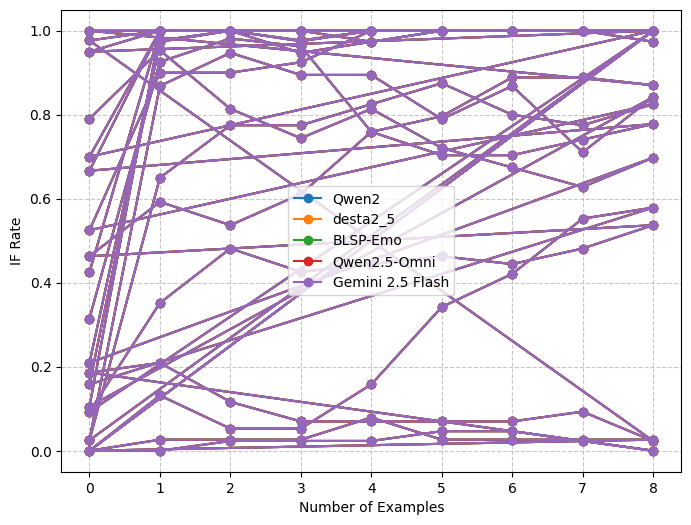

In [137]:
plt.figure(figsize=(8, 6))
for model in MODEL_ORDER:
    # sub_tmp = DF_ceq[(DF_ceq["IF_task_group"] == group) & (DF_ceq["model"] == model)]
    sub_tmp = DF_audio_task_cot
    plt.plot(
        sub_tmp["shot_level"],
        sub_tmp["w/o CoT Acc"],
        marker='o',
        label=MAP_MODEL_NAME[model]
    )
# plt.title(f"CEQ Strict IF Rate vs Shot Level for {group}")
plt.xlabel("Number of Examples")
plt.ylabel("IF Rate")
plt.xticks(range(9))
plt.grid(linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
# plt.savefig(f"figures/plots_ceq_if_rate_{group}.png", dpi=300)

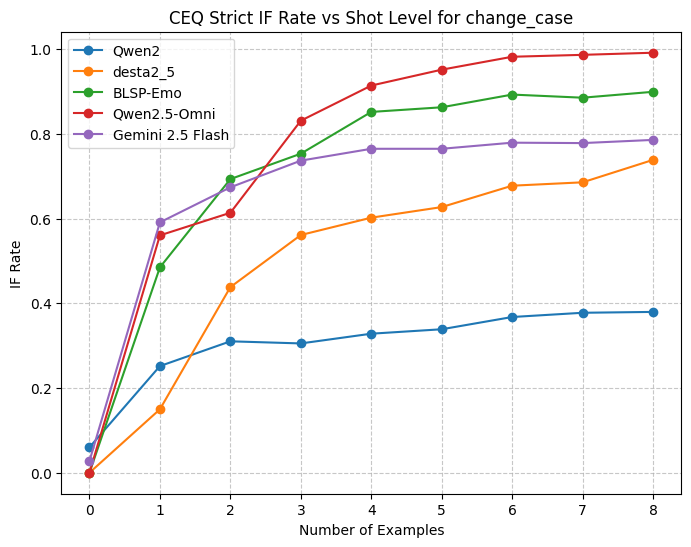

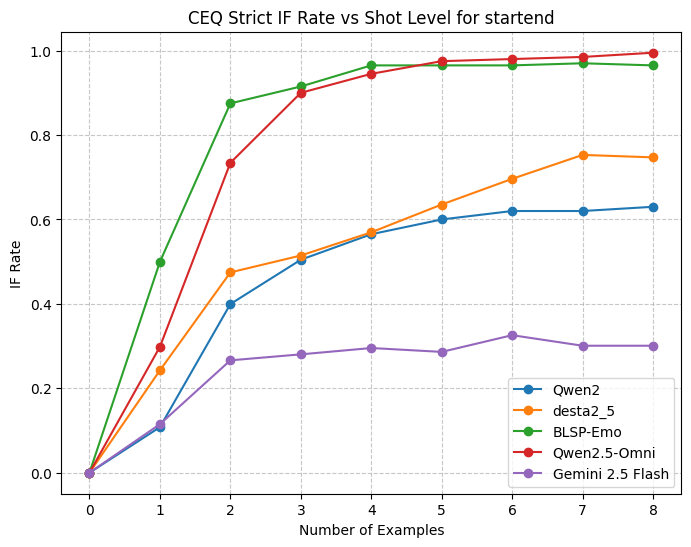

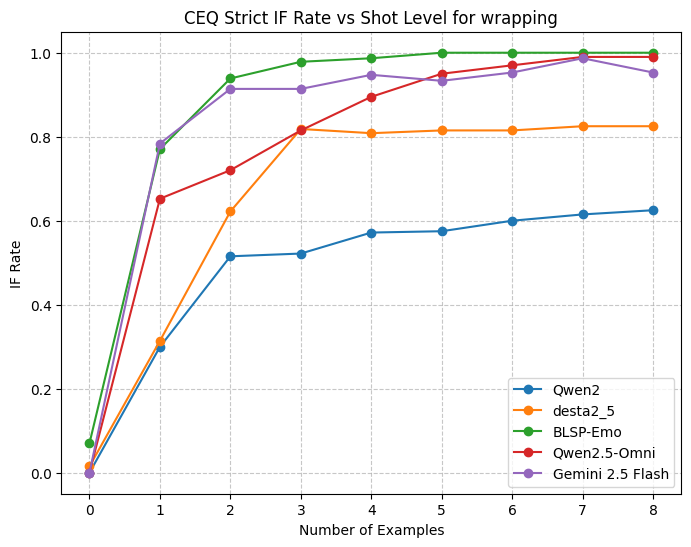

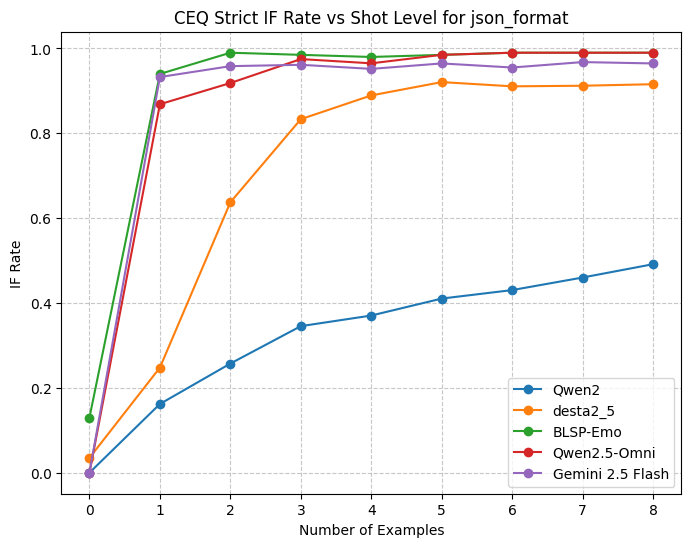

In [138]:
for group in GROUP_ORDER_CEQ:
    plt.figure(figsize=(8, 6))
    for model in MODEL_ORDER:
        sub_tmp = DF_ceq[(DF_ceq["IF_task_group"] == group) & (DF_ceq["model"] == model)]
        plt.plot(
            sub_tmp["shot_level"],
            sub_tmp["if_rate_strict"],
            marker='o',
            label=MAP_MODEL_NAME[model]
        )
    plt.title(f"CEQ Strict IF Rate vs Shot Level for {group}")
    plt.xlabel("Number of Examples")
    plt.ylabel("IF Rate")
    plt.xticks(range(9))
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.savefig(f"figures/plots_ceq_if_rate_{group}.png", dpi=300)

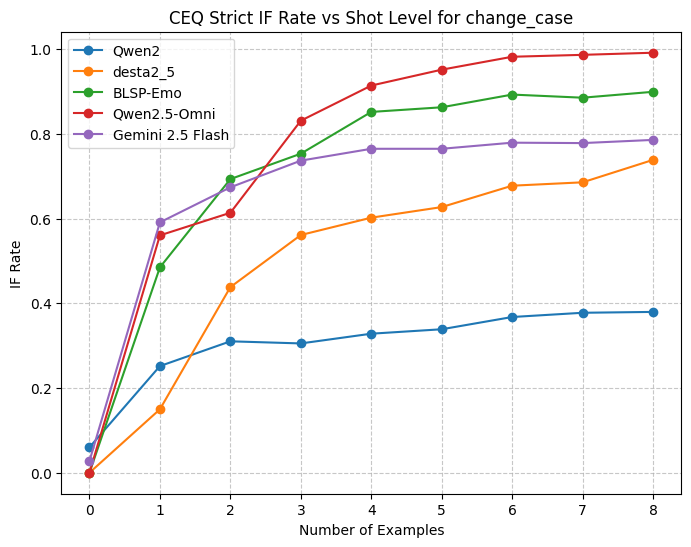

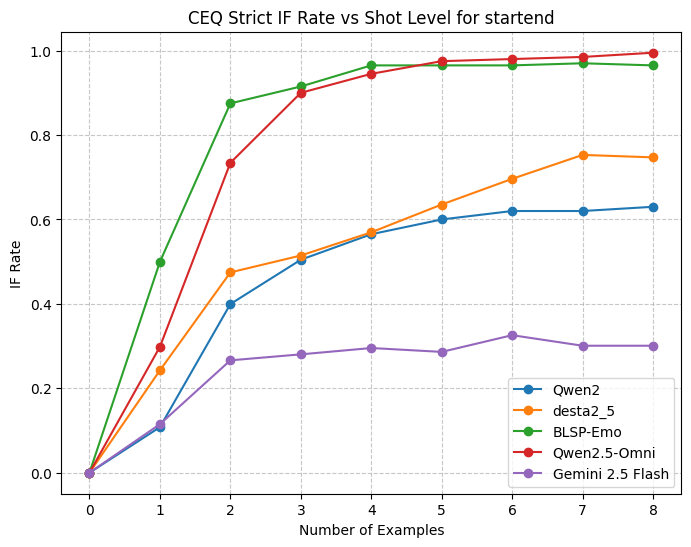

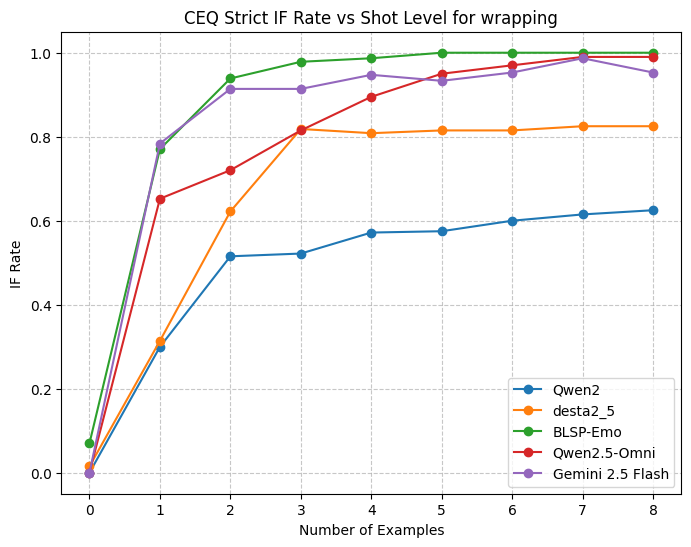

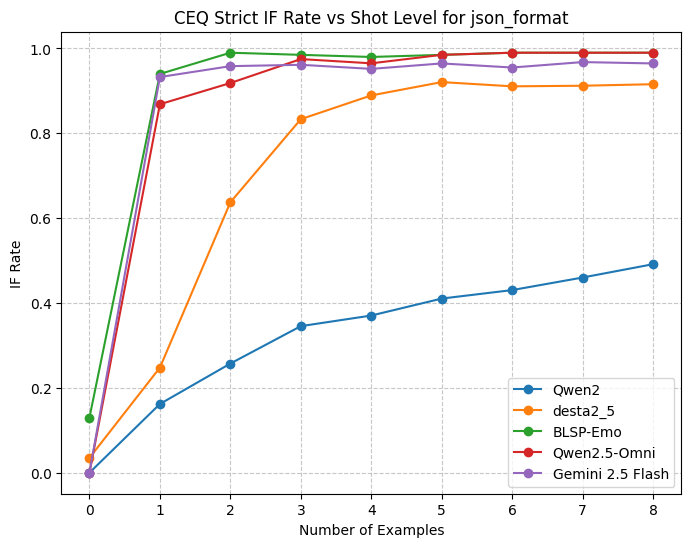

In [81]:
for group in GROUP_ORDER_CEQ:
    plt.figure(figsize=(8, 6))
    for model in MODEL_ORDER:
        sub_tmp = DF_ceq[(DF_ceq["IF_task_group"] == group) & (DF_ceq["model"] == model)]
        plt.plot(
            sub_tmp["shot_level"],
            sub_tmp["if_rate_strict"],
            marker='o',
            label=MAP_MODEL_NAME[model]
        )
    plt.title(f"CEQ Strict IF Rate vs Shot Level for {group}")
    plt.xlabel("Number of Examples")
    plt.ylabel("IF Rate")
    plt.xticks(range(9))
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.savefig(f"figures/plots_ceq_if_rate_{group}.png", dpi=300)

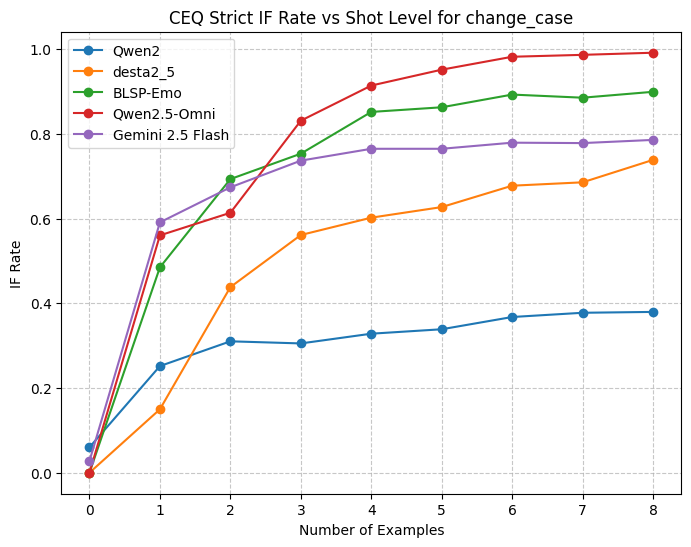

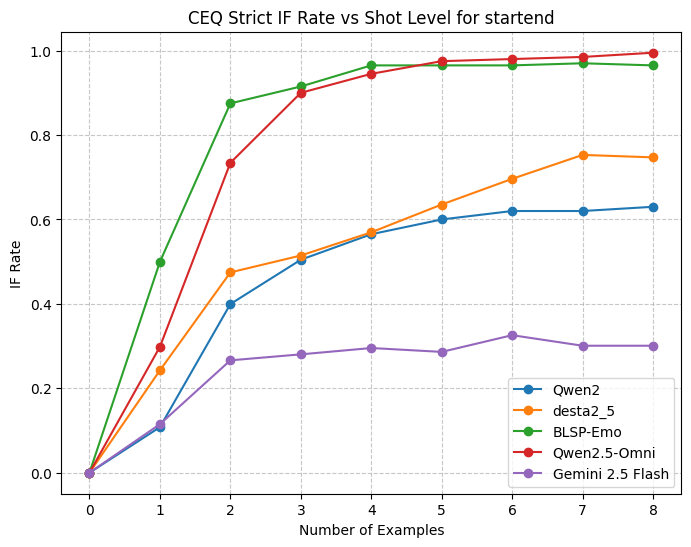

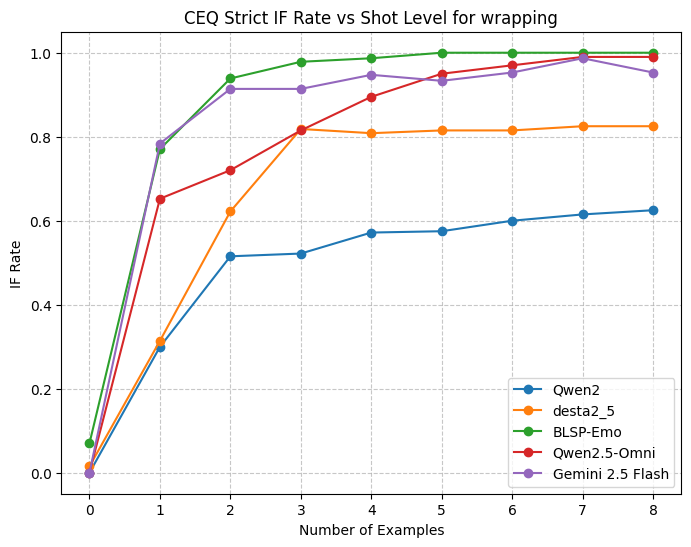

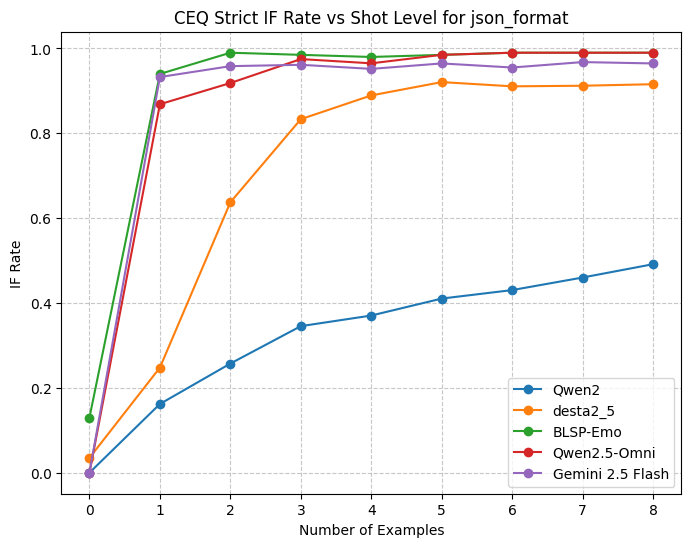

In [73]:
for group in GROUP_ORDER_CEQ:
    plt.figure(figsize=(8, 6))
    for model in MODEL_ORDER:
        sub_tmp = DF_ceq[(DF_ceq["IF_task_group"] == group) & (DF_ceq["model"] == model)]
        plt.plot(
            sub_tmp["shot_level"],
            sub_tmp["if_rate_strict"],
            marker='o',
            label=MAP_MODEL_NAME[model]
        )
    plt.title(f"CEQ Strict IF Rate vs Shot Level for {group}")
    plt.xlabel("Number of Examples")
    plt.ylabel("IF Rate")
    plt.xticks(range(9))
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.savefig(f"figures/plots_ceq_if_rate_{group}.png", dpi=300)

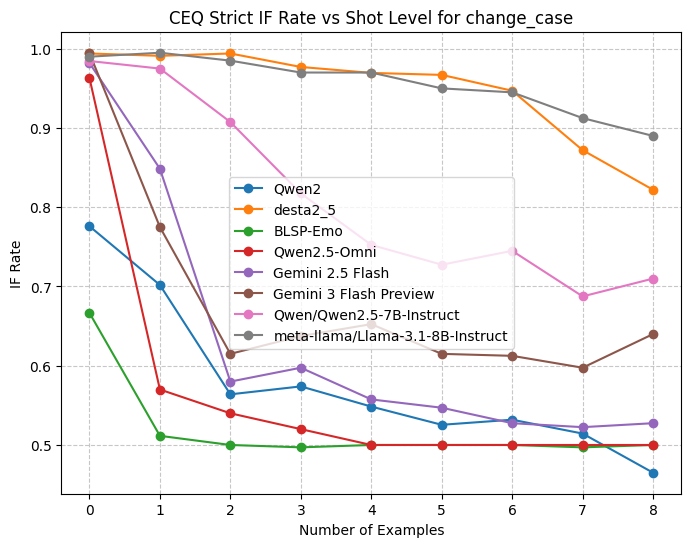

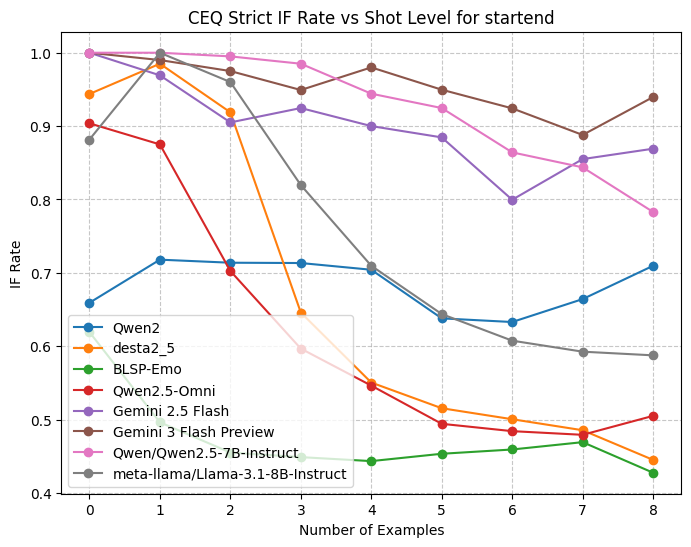

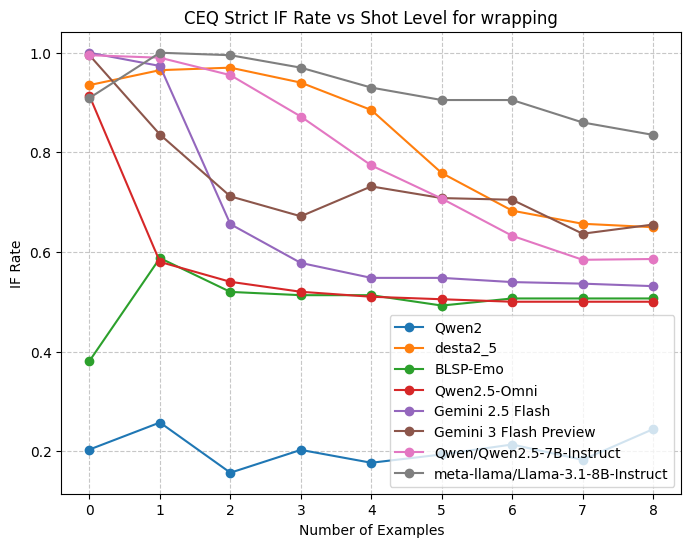

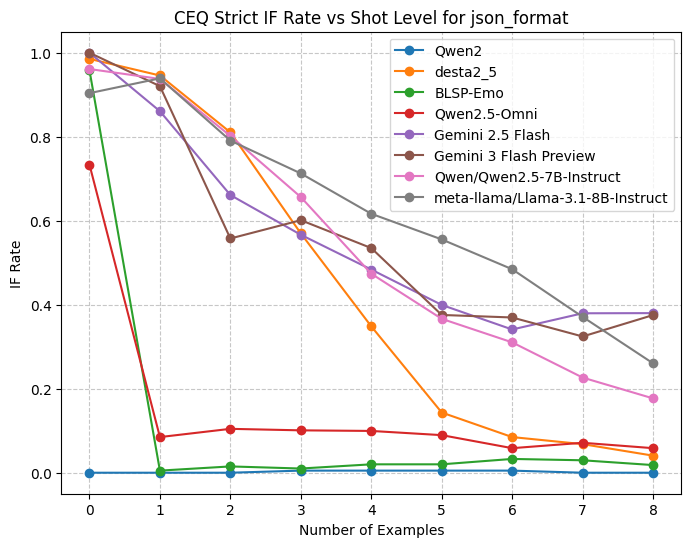

In [27]:
for group in GROUP_ORDER_CEQ:
    plt.figure(figsize=(8, 6))
    for model in MODEL_ORDER:
        sub_tmp = DF_ceq[(DF_ceq["IF_task_group"] == group) & (DF_ceq["model"] == model)]
        plt.plot(
            sub_tmp["shot_level"],
            sub_tmp["if_rate_strict"],
            marker='o',
            label=MAP_MODEL_NAME[model]
        )
    plt.title(f"CEQ Strict IF Rate vs Shot Level for {group}")
    plt.xlabel("Number of Examples")
    plt.ylabel("IF Rate")
    plt.xticks(range(9))
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.savefig(f"figures/plots_ceq_if_rate_{group}.png", dpi=300)

In [130]:
tmp

,,ASR,SER,GR,MMAU
model,Shot Level,,,,
qwen2,0,0.300,0.785,0.215,0.826181
desta2_5,0,0.475,0.985,0.900,0.866424
blsp-emo,0,0.935,1.000,1.000,0.919286
qwen25_omni,0,0.975,1.000,1.000,0.991548
gemini-2.5-flash,0,0.720,0.855,0.810,0.619142


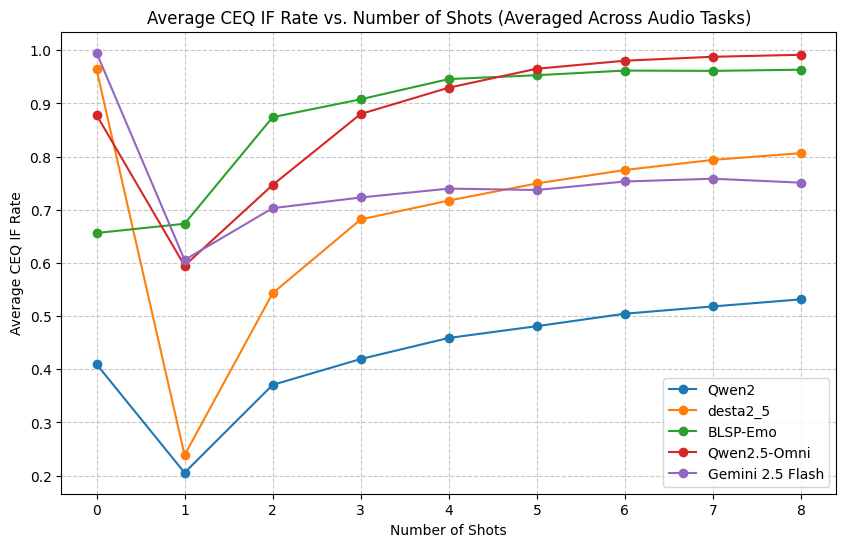

In [140]:
tmp = pd.DataFrame(avg)
avg["avg"] = tmp.mean(axis=1)
std["avg"] = tmp.std(axis=1)
plt.figure(figsize=(10, 6))
for model in MODEL_ORDER:
    y = avg["avg"][model]
    plt.plot(
        shot_levels, y,
        color=model_color[model],
        marker="o",
        label=f"{MAP_MODEL_NAME[model]}",
    )
plt.legend()
plt.grid(linestyle="--", alpha=0.7)
plt.xlabel("Number of Shots")
plt.ylabel("Average CEQ IF Rate")
plt.title("Average CEQ IF Rate vs. Number of Shots (Averaged Across Audio Tasks)")
plt.show()

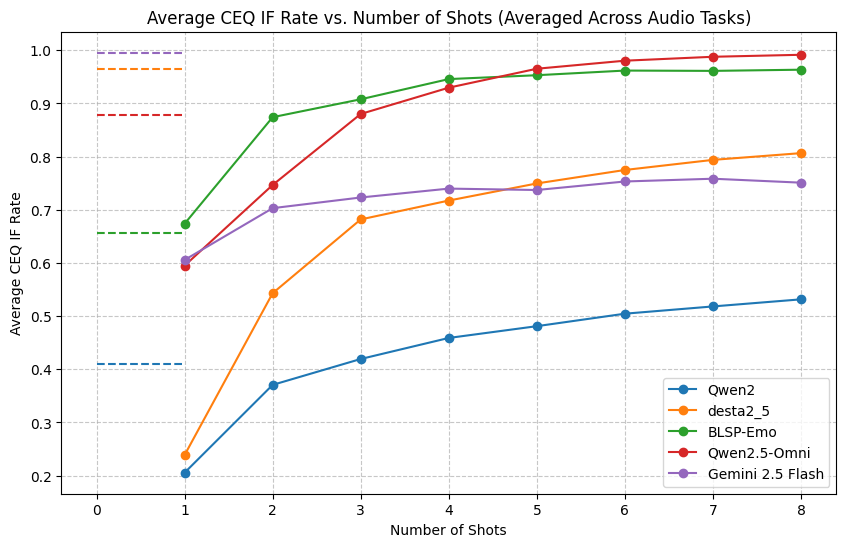

In [147]:
tmp = pd.DataFrame(avg)
avg["avg"] = tmp.mean(axis=1)
std["avg"] = tmp.std(axis=1)
plt.figure(figsize=(10, 6))
for model in MODEL_ORDER:
    y = avg["avg"][model]
    plt.plot(
        shot_levels[1:], y[1:],
        color=model_color[model],
        marker="o",
        label=f"{MAP_MODEL_NAME[model]}",
    )
    plt.hlines(y=y[0], xmin=0, xmax=1, color=model_color[model], linestyles='--')
plt.legend(loc="lower right")
plt.grid(linestyle="--", alpha=0.7)
plt.xlabel("Number of Shots")
plt.ylabel("Average CEQ IF Rate")
plt.title("Average CEQ IF Rate vs. Number of Shots (Averaged Across Audio Tasks)")
plt.show()

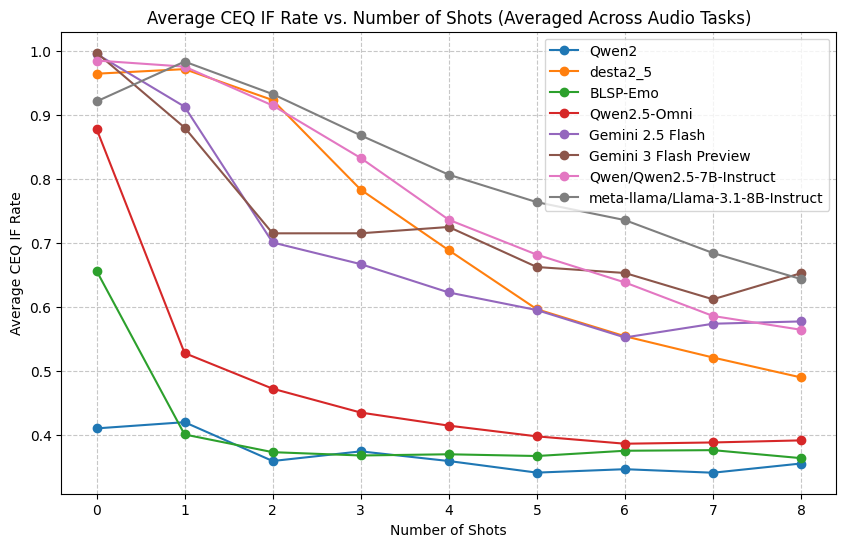

In [136]:
tmp = pd.DataFrame(avg)
avg["avg"] = tmp.mean(axis=1)
std["avg"] = tmp.std(axis=1)
plt.figure(figsize=(10, 6))
for model in MODEL_ORDER:
    y = avg["avg"][model]
    plt.plot(
        shot_levels, y,
        color=model_color[model],
        marker="o",
        label=f"{MAP_MODEL_NAME[model]}",
    )
plt.legend()
plt.grid(linestyle="--", alpha=0.7)
plt.xlabel("Number of Shots")
plt.ylabel("Average CEQ IF Rate")
plt.title("Average CEQ IF Rate vs. Number of Shots (Averaged Across Audio Tasks)")
plt.show()

In [137]:
outs_ = {}
for k, v in df_audio_task_ceq.items():
    outs_[k] = []
    for shot_level in v["shot_level"].unique():
        tmp = v.loc[v["shot_level"].eq(shot_level)].copy()
        tmp["model"] = pd.Categorical(tmp["model"], categories=MODEL_ORDER, ordered=True)
        tmp["IF_task_group"] = pd.Categorical(tmp["IF_task_group"], categories=GROUP_ORDER_CEQ, ordered=True)

        out = tmp.pivot_table(
            index="model",
            columns="IF_task_group",
            values="if_rate_strict",
            aggfunc="mean",
            observed=False,
            sort=False,
        )
        outs_[k].append(out)

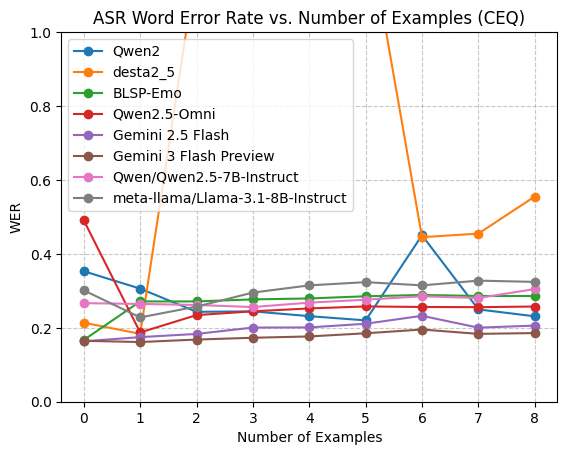

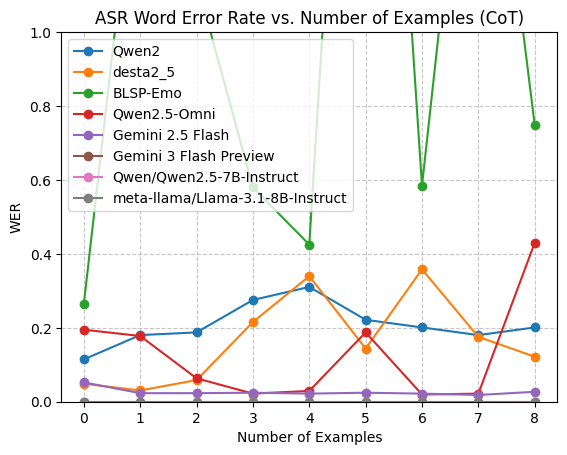

In [43]:
for resp in ["CEQ", "CoT"]:
    for model in MODEL_ORDER:
        y = pt_audio_tasks["mean_performance"]["ASR"][resp][model]
        plt.plot(y, label=MAP_MODEL_NAME[model], marker="o")
    plt.legend(fontsize=10)
    plt.grid(linestyle="--", alpha=0.7)
    plt.ylim(0, 1)
    plt.xlabel("Number of Examples")
    plt.ylabel("WER")
    plt.title(f"ASR Word Error Rate vs. Number of Examples ({resp})")
    plt.savefig(f"figures/plots_asr_wer_{resp}.png", dpi=300)
    plt.show()

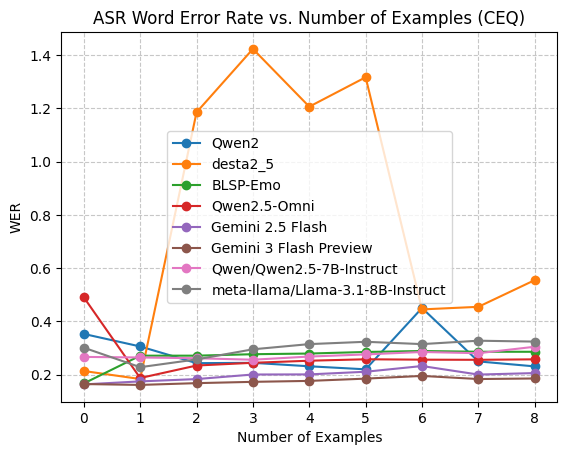

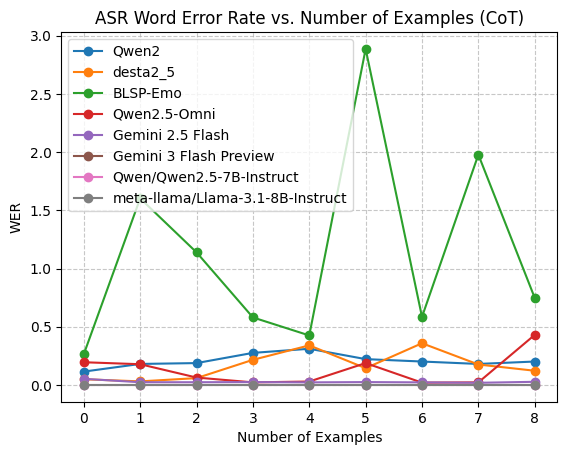

In [40]:
for resp in ["CEQ", "CoT"]:
    for model in MODEL_ORDER:
        y = pt_audio_tasks["mean_performance"]["ASR"][resp][model]
        plt.plot(y, label=MAP_MODEL_NAME[model], marker="o")
    plt.legend(fontsize=10)
    plt.grid(linestyle="--", alpha=0.7)
    plt.xlabel("Number of Examples")
    plt.ylabel("WER")
    plt.title(f"ASR Word Error Rate vs. Number of Examples ({resp})")
    plt.savefig(f"figures/plots_asr_wer_{resp}.png", dpi=300)
    plt.show()

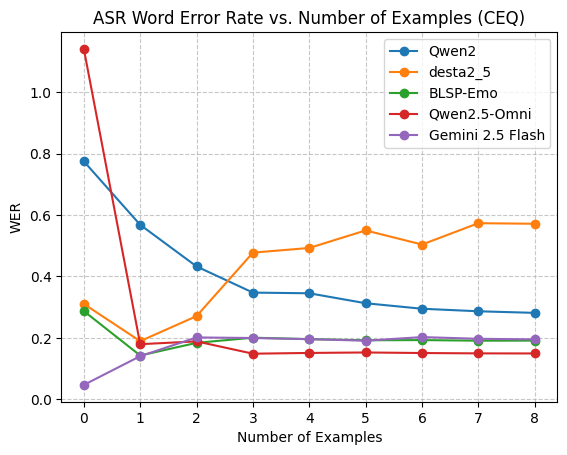

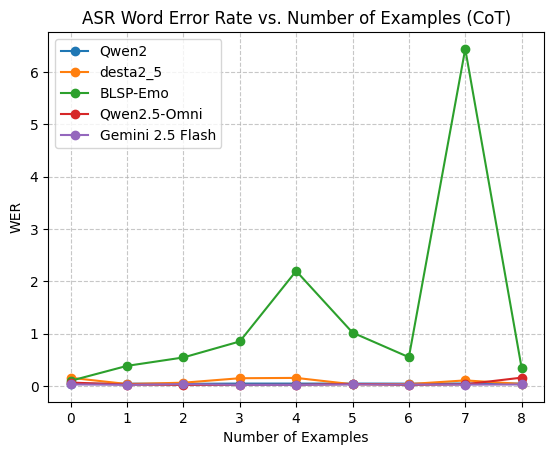

In [98]:
for resp in ["CEQ", "CoT"]:
    for model in MODEL_ORDER:
        y = pt_audio_tasks["mean_performance"]["ASR"][resp][model]
        plt.plot(y, label=MAP_MODEL_NAME[model], marker="o")
    plt.legend(fontsize=10)
    plt.grid(linestyle="--", alpha=0.7)
    # plt.ylim(0, 1)
    plt.xlabel("Number of Examples")
    plt.ylabel("WER")
    plt.title(f"ASR Word Error Rate vs. Number of Examples ({resp})")
    plt.savefig(f"figures/plots_asr_wer_{resp}.png", dpi=300)
    plt.show()

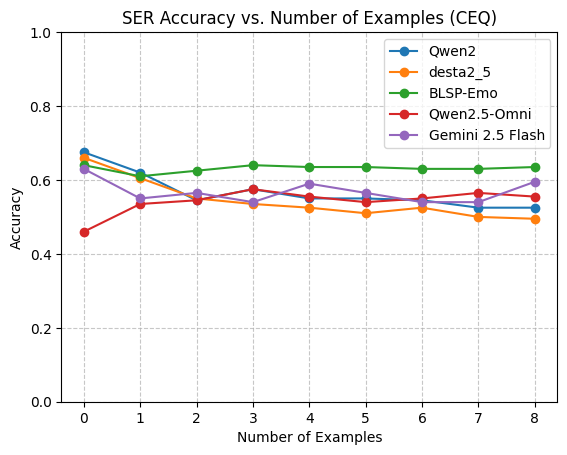

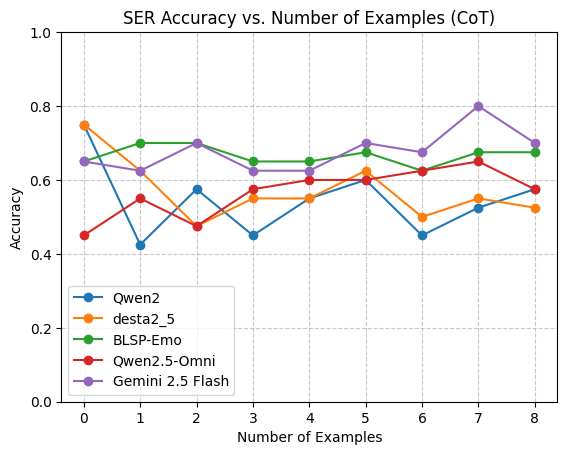

In [103]:
for resp in ["CEQ", "CoT"]:
    for model in MODEL_ORDER:
        y = pt_audio_tasks["mean_performance"]["SER"][resp][model]
        plt.plot(y, label=MAP_MODEL_NAME[model], marker="o")
    plt.legend(fontsize=10)
    plt.grid(linestyle="--", alpha=0.7)
    plt.xlabel("Number of Examples")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.title(f"SER Accuracy vs. Number of Examples ({resp})")
    plt.savefig(f"figures/plots_ser_acc_{resp}.png", dpi=300)
    plt.show()


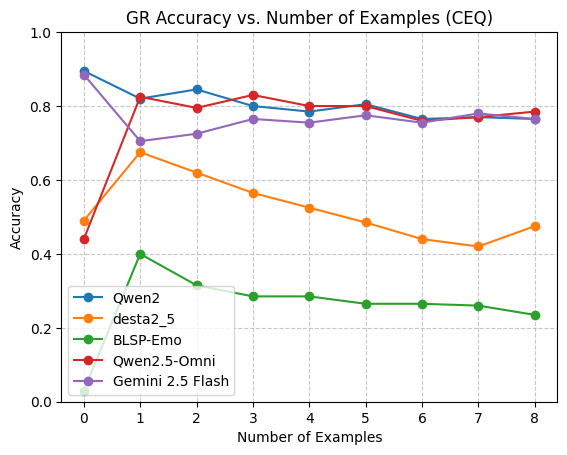

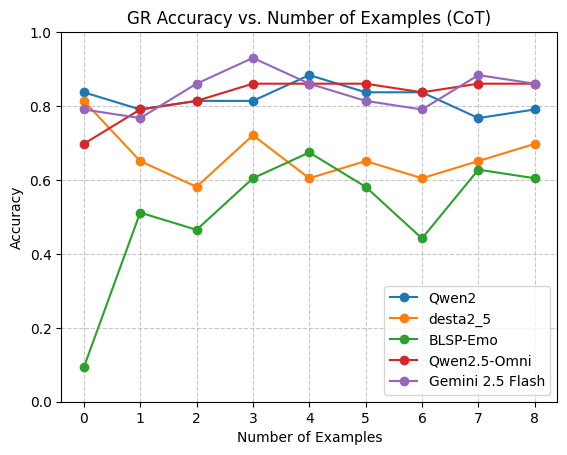

In [100]:
for resp in ["CEQ", "CoT"]:
    for model in MODEL_ORDER:
        y = pt_audio_tasks["mean_performance"]["GR"][resp][model]
        plt.plot(y, label=MAP_MODEL_NAME[model], marker="o")
    plt.legend(fontsize=10)
    plt.grid(linestyle="--", alpha=0.7)
    plt.xlabel("Number of Examples")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.title(f"GR Accuracy vs. Number of Examples ({resp})")
    plt.savefig(f"figures/plots_gr_acc_{resp}.png", dpi=300)
    plt.show()

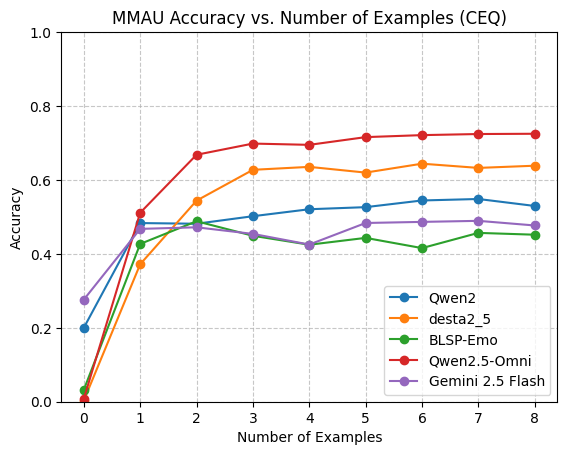

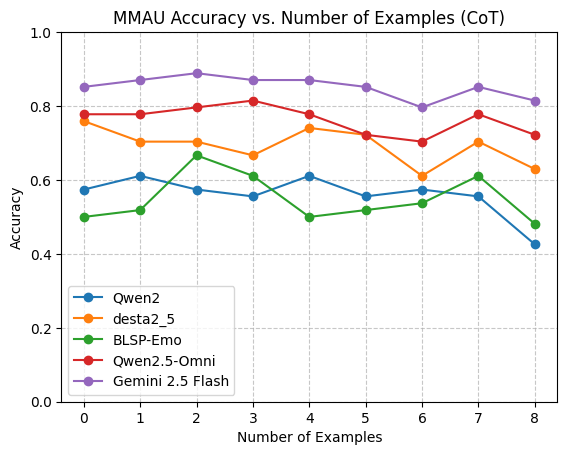

In [102]:
for resp in ["CEQ", "CoT"]:
    for model in MODEL_ORDER:
        y = pt_audio_tasks["mean_performance"]["MMAU"][resp][model]
        plt.plot(y, label=MAP_MODEL_NAME[model], marker="o")
    plt.legend(fontsize=10)
    plt.grid(linestyle="--", alpha=0.7)
    plt.xlabel("Number of Examples")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.title(f"MMAU Accuracy vs. Number of Examples ({resp})")
    plt.savefig(f"figures/plots_mmau_acc_{resp}.png", dpi=300)
    plt.show()